# Summary ML

# 

In [1]:
#Importando librearias
import sys
import os
import json
import tempfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
sys.path.append('../')
sys.path.append('../../')
from sklearn.svm import SVC
from Resources.mlTracker import *
from Python.Style.styles import  *
from scipy.stats import expon, randint
from mlflow.tracking import MlflowClient

In [2]:
#Desactivando wrnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Utilizando diseño base 1
plt.style.use('../../Python/Style/style1.mplstyle')

In [4]:
#Colores base
#Diseño base
mClr = designC['cs']
mClr_d2 = plt.get_cmap('cs-d')(2)
sClr1 = designC['nr']
sClr1_d2 = plt.get_cmap('nr-d')(2)
sClr3 = designC['az']
sClr2 = designC['gr']
sClr2_d = plt.get_cmap('gr-d')(0)
sClr2_d2 = plt.get_cmap('gr-d')(2)
sClr4 = designC['vr']
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 120

In [5]:
#Leyendo métricas de mlflow
client = MlflowClient()
experiment_id = client.get_experiment_by_name('Results ML').experiment_id
runs = client.search_runs(experiment_id)
metrics = []
names = []
for run in runs:
    metrics.append(run.data.metrics)
    names.append(run.data.tags['mlflow.runName'])
df = pd.DataFrame(metrics)
columns = df.columns
df['name'] = names
columns = ['name'] + list(columns)
df = df[columns]

In [6]:
#Maximo
df["Test"] = df["name"].str.extract(r"(Test[\d])")
df["Experiment"] = df["name"].str.extract(r"(ML[\d]?)")
df["Algoritmo"] = df["name"].str.extract(r"ML[\d]?-(\w+)-")
df["DatosEntrenamiento"] = df["name"].str.extract(r"ML[\d]?-\w+-(\w+[-]?[\w]*) ")
df.drop_duplicates(inplace=True)
#Simplificando nombres
df["DatosEntrenamiento"] = df["DatosEntrenamiento"].str.replace("Training-Undersampled","Training_US")
df["DatosEntrenamiento"] = df["DatosEntrenamiento"].str.replace("Training-Oversampled","Training_OS")
df

,name,F1 Score Macro,F1 Score Weighted,Accuracy,Recall,F1 Score Micro,True Positives,True Negatives,Precision,False Negatives,False Positives,Test,Experiment,Algoritmo,DatosEntrenamiento
0,ML3-KNN-Oversampled Test2,0.565642,0.894959,0.875118,0.905701,0.875118,67491.0,1218.0,0.960466,7027.0,2778.0,Test2,ML3,KNN,Oversampled
1,ML3-KNN-Oversampled Test1,0.713419,0.937152,0.919996,0.921589,0.919996,47131.0,1891.0,0.994661,4010.0,253.0,Test1,ML3,KNN,Oversampled
2,ML3-KNN-Undersampled Test2,0.513798,0.818379,0.750299,0.762688,0.750299,56834.0,2075.0,0.967305,17684.0,1921.0,Test2,ML3,KNN,Undersampled
3,ML3-KNN-Undersampled Test1,0.548714,0.839524,0.770348,0.766411,0.770348,39195.0,1853.0,0.992630,11946.0,291.0,Test1,ML3,KNN,Undersampled
4,ML2-RF-Training-Oversampled Test2,0.583871,0.889723,0.862509,0.885464,0.862509,65983.0,1736.0,0.966883,8535.0,2260.0,Test2,ML2,RF,Training_OS
5,ML2-RF-Training-Oversampled Test1,0.651837,0.913319,0.884095,0.886080,0.884095,45315.0,1794.0,0.992335,5826.0,350.0,Test1,ML2,RF,Training_OS
6,ML3-SVM-Training-Undersampled Test2,0.566570,0.890701,0.867017,0.895368,0.867017,66721.0,1352.0,0.961883,7797.0,2644.0,Test2,ML3,SVM,Training_US
7,ML3-SVM-Training-Undersampled Test1,0.677744,0.921248,0.895355,0.894546,0.895355,45748.0,1961.0,0.996016,5393.0,183.0,Test1,ML3,SVM,Training_US
8,ML2-RF-Training-Undersampled Test2,0.590717,0.877167,0.839213,0.852599,0.839213,63534.0,2356.0,0.974837,10984.0,1640.0,Test2,ML2,RF,Training_US
9,ML2-RF-Training-Undersampled Test1,0.612268,0.892681,0.852116,0.853659,0.852116,43657.0,1748.0,0.991011,7484.0,396.0,Test1,ML2,RF,Training_US


In [7]:
#Agregando MPCA
def mpca(x):
    tp = x["True Positives"]
    tn = x["True Negatives"]
    fp = x["False Positives"]
    fn = x["False Negatives"]
    precission_0 = tn/(tn+fp)
    precission_1 = tp/(tp+fn)
    return (precission_0 + precission_1)/2
df["MPCA"] = df.apply(mpca,axis=1)
df.head()

,name,F1 Score Macro,F1 Score Weighted,Accuracy,Recall,F1 Score Micro,True Positives,True Negatives,Precision,False Negatives,False Positives,Test,Experiment,Algoritmo,DatosEntrenamiento,MPCA
0,ML3-KNN-Oversampled Test2,0.565642,0.894959,0.875118,0.905701,0.875118,67491.0,1218.0,0.960466,7027.0,2778.0,Test2,ML3,KNN,Oversampled,0.605253
1,ML3-KNN-Oversampled Test1,0.713419,0.937152,0.919996,0.921589,0.919996,47131.0,1891.0,0.994661,4010.0,253.0,Test1,ML3,KNN,Oversampled,0.901793
2,ML3-KNN-Undersampled Test2,0.513798,0.818379,0.750299,0.762688,0.750299,56834.0,2075.0,0.967305,17684.0,1921.0,Test2,ML3,KNN,Undersampled,0.640979
3,ML3-KNN-Undersampled Test1,0.548714,0.839524,0.770348,0.766411,0.770348,39195.0,1853.0,0.992630,11946.0,291.0,Test1,ML3,KNN,Undersampled,0.815341
4,ML2-RF-Training-Oversampled Test2,0.583871,0.889723,0.862509,0.885464,0.862509,65983.0,1736.0,0.966883,8535.0,2260.0,Test2,ML2,RF,Training_OS,0.659949


In [8]:
#Almacenando resultados
df.to_csv('../../Data/DataMart/temp/results.csv', index=False)
df.to_parquet('../../Data/DataMart/temp/results.parquet', index=False)

In [10]:
def plot_dataframe_as_table(df, columns_to_color=None, cmap='viridis', title="Tabla de resultados"):
    fig, ax = plt.subplots(figsize=(12, len(df)*0.4)) 
    ax.axis('tight')
    ax.axis('off')
    colormap = plt.get_cmap(cmap)
    #Aplicando escala de color
    cell_colors = []
    for i, row in df.iterrows():
        row_colors = []
        for col in df.columns:
            if columns_to_color and col in columns_to_color:
                norm = Normalize(vmin=df[col].min(), vmax=df[col].max())
                row_colors.append(colormap(norm(row[col])))
            else:
                row_colors.append((1, 1, 1, 1))
        cell_colors.append(row_colors)
    
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', cellColours=cell_colors)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    
    plt.title(title)
    plt.show()

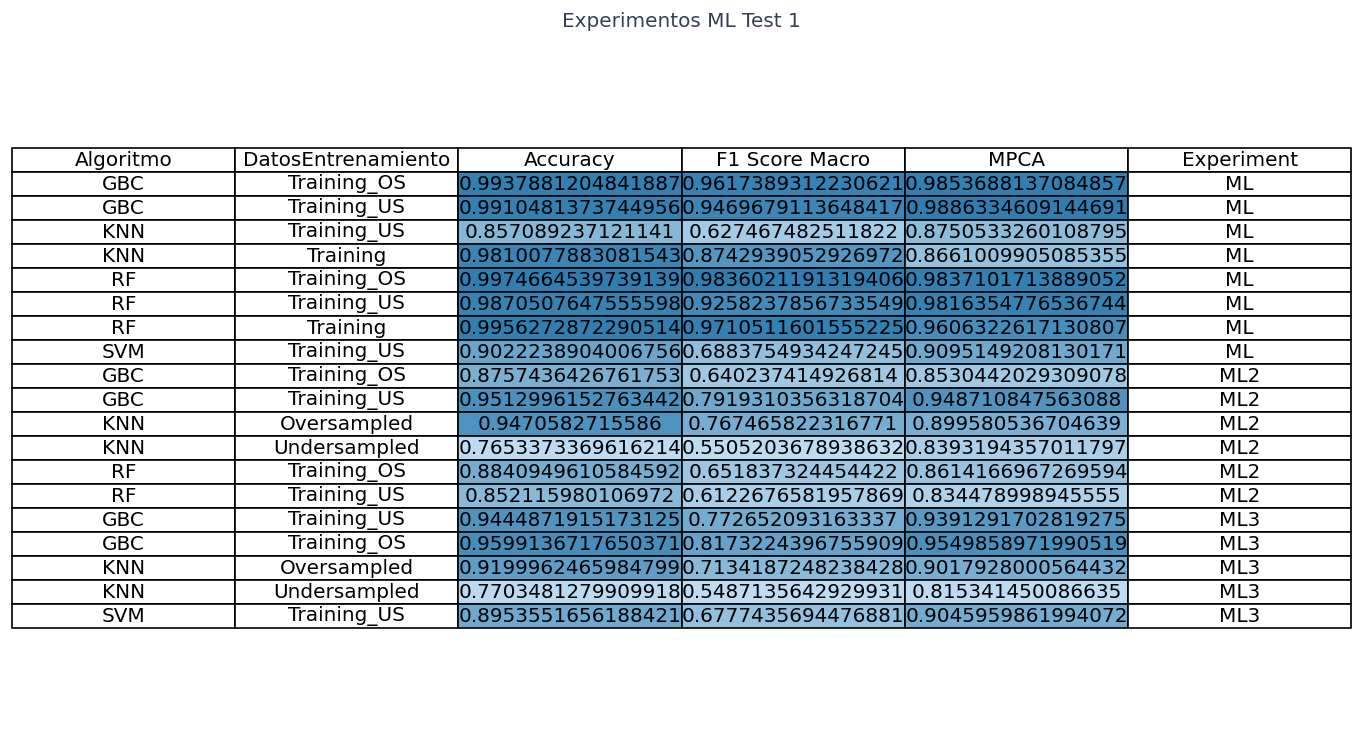

In [11]:
#Experimentos ML test 1
df_ml = df[df['Experiment'].str.contains('ML')]
df_ml = df_ml[df_ml['Test'] == 'Test1']
df_ml = df_ml[["Algoritmo","DatosEntrenamiento","Accuracy","F1 Score Macro","MPCA","Experiment"]]
df_ml = df_ml.sort_values(by=['Experiment','Algoritmo'])
plot_dataframe_as_table(df_ml, columns_to_color=['Accuracy', 'F1 Score Macro', 'MPCA'], cmap='cs-c', title='Experimentos ML Test 1')

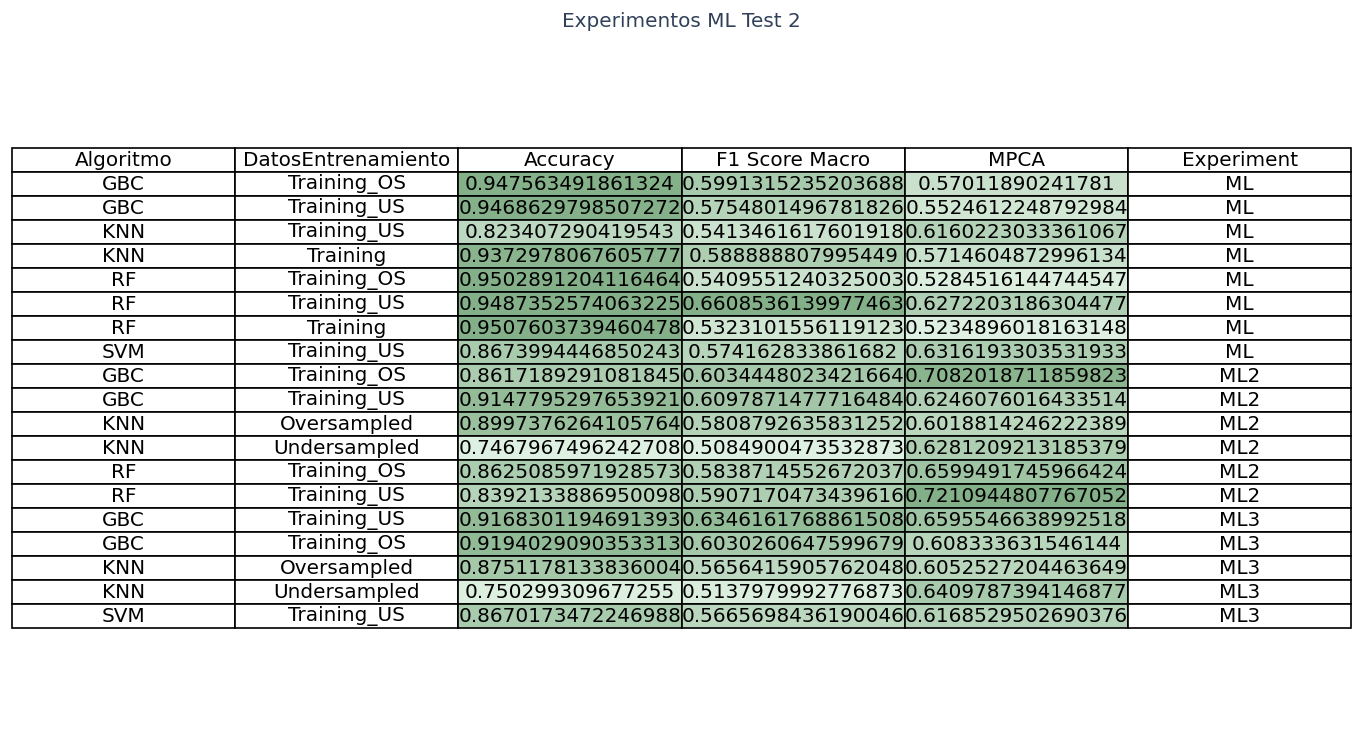

In [12]:
#Experimentos ML test 1
df_ml_2 = df[df['Experiment'].str.contains('ML')]
df_ml_2 = df_ml_2[df_ml_2['Test'] == 'Test2']
df_ml_2 = df_ml_2[["Algoritmo","DatosEntrenamiento","Accuracy","F1 Score Macro","MPCA","Experiment"]]
df_ml_2 = df_ml_2.sort_values(by=['Experiment','Algoritmo'])
plot_dataframe_as_table(df_ml_2, columns_to_color=['Accuracy', 'F1 Score Macro', 'MPCA'], cmap='vr-c', title='Experimentos ML Test 2')

## Selección de mejores modelos para problema 1

In [13]:
#Mejor modelo según Accuracy
df_ml_acc = df_ml[df_ml['Accuracy'] == df_ml['Accuracy'].max()]
df_ml_acc

,Algoritmo,DatosEntrenamiento,Accuracy,F1 Score Macro,MPCA,Experiment
27,RF,Training_OS,0.997466,0.983602,0.98371,ML


In [14]:
#Mejor modelo según F1 Score Macro
df_ml_f1 = df_ml[df_ml['F1 Score Macro'] == df_ml['F1 Score Macro'].max()]
df_ml_f1

,Algoritmo,DatosEntrenamiento,Accuracy,F1 Score Macro,MPCA,Experiment
27,RF,Training_OS,0.997466,0.983602,0.98371,ML


In [15]:
#Mejor modelo según MPCA
df_ml_mpca = df_ml[df_ml['MPCA'] == df_ml['MPCA'].max()]
df_ml_mpca

,Algoritmo,DatosEntrenamiento,Accuracy,F1 Score Macro,MPCA,Experiment
25,GBC,Training_US,0.991048,0.946968,0.988633,ML


## Seleccionando mejores modelos para problema 2

In [16]:
#Mejor modelo según Accuracy
df_ml_acc_2 = df_ml_2[df_ml_2['Accuracy'] == df_ml_2['Accuracy'].max()]
df_ml_acc_2

,Algoritmo,DatosEntrenamiento,Accuracy,F1 Score Macro,MPCA,Experiment
30,RF,Training,0.95076,0.53231,0.52349,ML


In [17]:
#Mejor modelo según F1 Score Macro
df_ml_f1_2 = df_ml_2[df_ml_2['F1 Score Macro'] == df_ml_2['F1 Score Macro'].max()]
df_ml_f1_2

,Algoritmo,DatosEntrenamiento,Accuracy,F1 Score Macro,MPCA,Experiment
28,RF,Training_US,0.948735,0.660854,0.62722,ML


In [18]:
#Mejor modelo según MPCA
df_ml_mpca_2 = df_ml_2[df_ml_2['MPCA'] == df_ml_2['MPCA'].max()]
df_ml_mpca_2

,Algoritmo,DatosEntrenamiento,Accuracy,F1 Score Macro,MPCA,Experiment
8,RF,Training_US,0.839213,0.590717,0.721094,ML2
